In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")

data.head()


,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


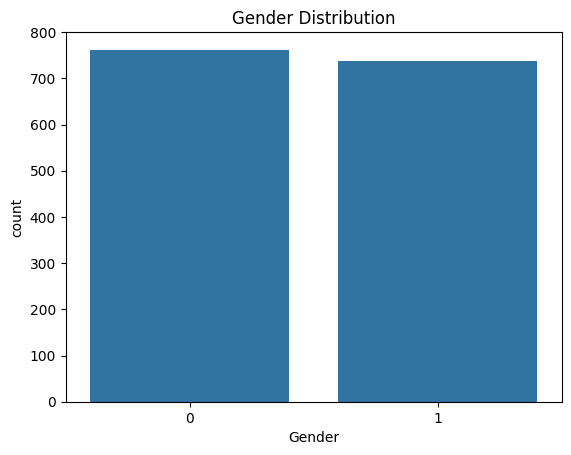

In [6]:

sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()


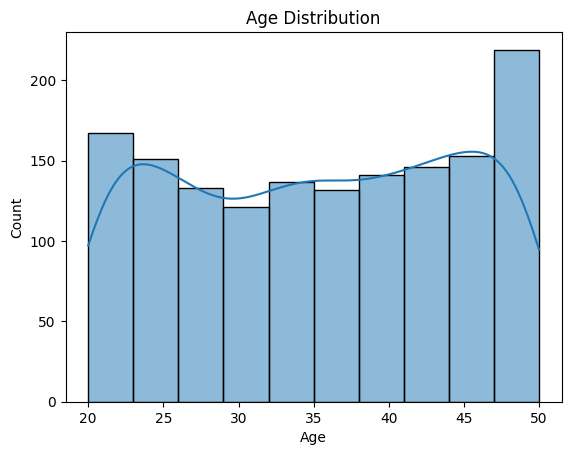

In [7]:
sns.histplot(df["Age"], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()



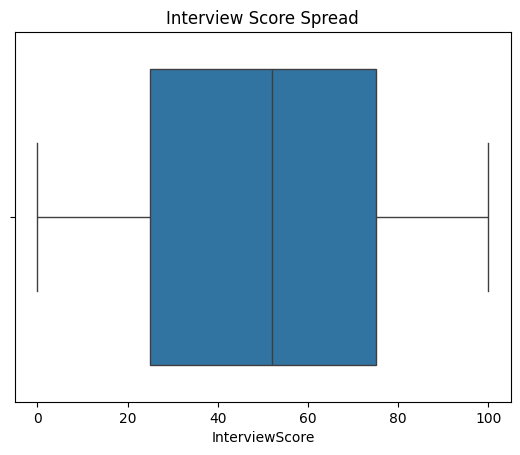

In [8]:

sns.boxplot(x=df["InterviewScore"])
plt.title("Interview Score Spread")
plt.show()

Hiring Rate Distribution

/tmp/ipython-input-16-1471069073.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="HiringDecision", palette=["salmon", "seagreen"])


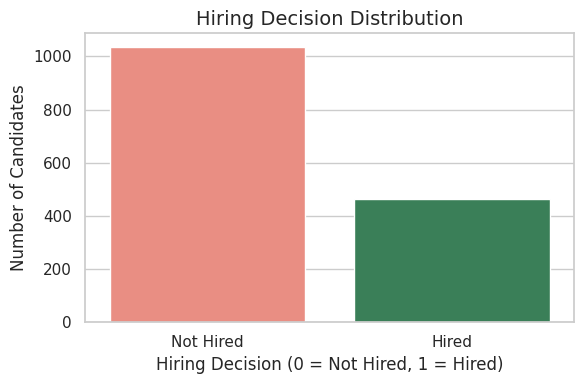

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="HiringDecision", palette=["salmon", "seagreen"])

plt.title("Hiring Decision Distribution", fontsize=14)
plt.xlabel("Hiring Decision (0 = Not Hired, 1 = Hired)")
plt.ylabel("Number of Candidates")
plt.xticks([0, 1], ["Not Hired", "Hired"])
plt.tight_layout()
plt.show()


/tmp/ipython-input-17-917305123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="HiringDecision", palette=["salmon", "seagreen"])


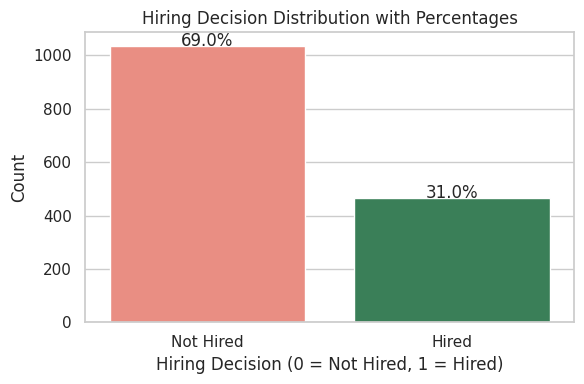

In [17]:
counts = df["HiringDecision"].value_counts().sort_index()
total = counts.sum()

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x="HiringDecision", palette=["salmon", "seagreen"])

# Add percentage labels
for i, count in enumerate(counts):
    pct = count / total * 100
    ax.text(i, count + 2, f"{pct:.1f}%", ha='center', fontsize=12)

plt.title("Hiring Decision Distribution with Percentages")
plt.xlabel("Hiring Decision (0 = Not Hired, 1 = Hired)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Hired", "Hired"])
plt.tight_layout()
plt.show()


Bivarite Analysis

/tmp/ipython-input-10-714199559.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


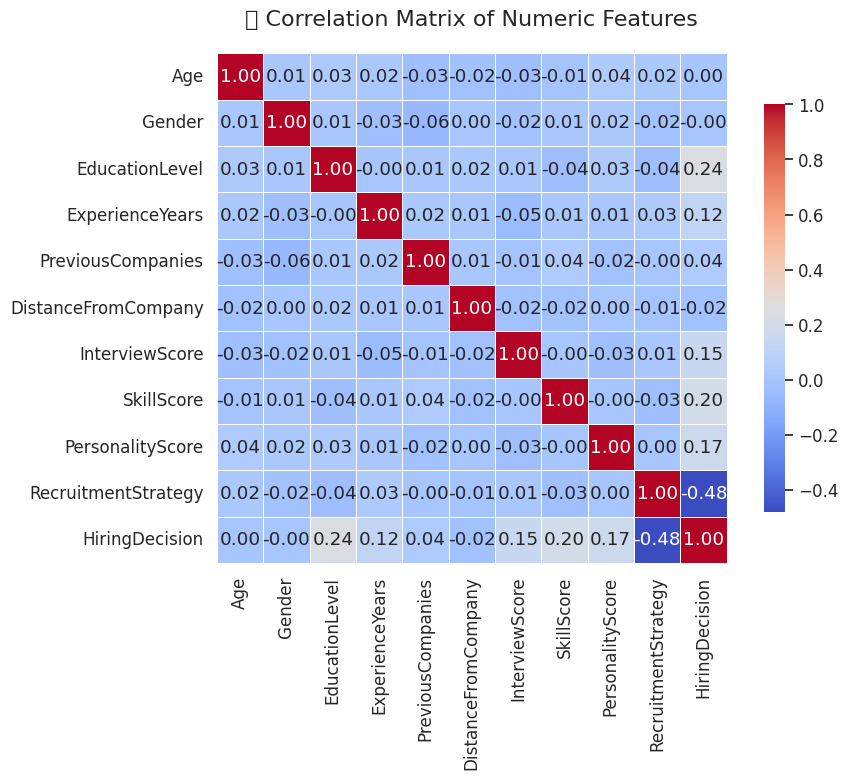

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.1)


sns.heatmap(
    corr.round(2),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix of Numeric Features", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


Hiring Rate by Recruitment Strategy

In [9]:
hiring_by_strategy = df.groupby("RecruitmentStrategy")["HiringDecision"].mean()
print(hiring_by_strategy)


RecruitmentStrategy
1    0.716854
2    0.136364
3    0.143860
Name: HiringDecision, dtype: float64


/tmp/ipython-input-11-715620062.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hiring_by_strategy, x="RecruitmentStrategy", y="HiringDecision", palette="pastel")
/tmp/ipython-input-11-715620062.py:24: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


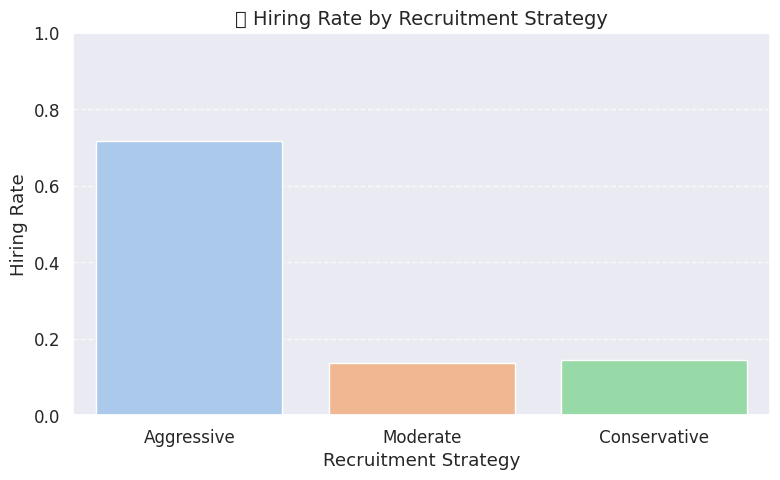

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

hiring_by_strategy = df.groupby("RecruitmentStrategy")["HiringDecision"].mean().reset_index()

strategy_labels = {
    1: "Aggressive",
    2: "Moderate",
    3: "Conservative"
}
hiring_by_strategy["RecruitmentStrategy"] = hiring_by_strategy["RecruitmentStrategy"].map(strategy_labels)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=hiring_by_strategy, x="RecruitmentStrategy", y="HiringDecision", palette="pastel")

plt.title("Hiring Rate by Recruitment Strategy", fontsize=14)
plt.ylabel("Hiring Rate")
plt.xlabel("Recruitment Strategy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Strategy 1 hires 7× more often than Strategy 2 or 3.

Strategies 2 and 3 are similarly selective (low hiring rates).

This explains the negative correlation (–0.478) between RecruitmentStrategy and HiringDecision:

As the strategy number increases (1 → 3), the hiring rate sharply decreases.

Strategy 1 is generous and disproportionately contributes to hiring.

Strategy 2 is the main pipeline, but has very low conversion.

This imbalance could cause the model to learn that strategy = outcome, making it act like a proxy if not carefully handled.

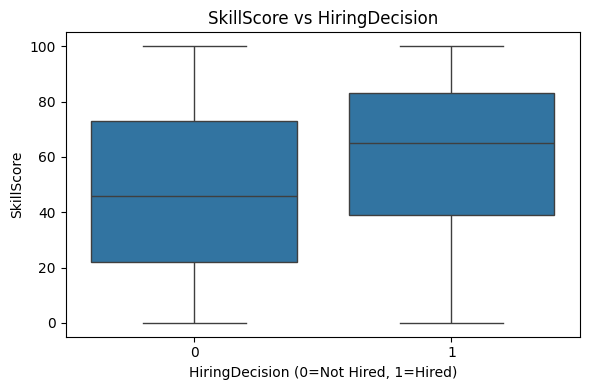

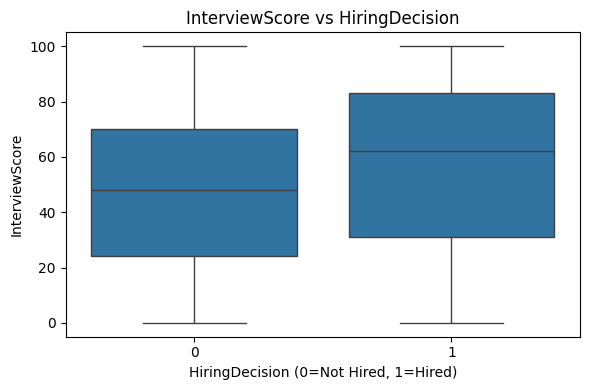

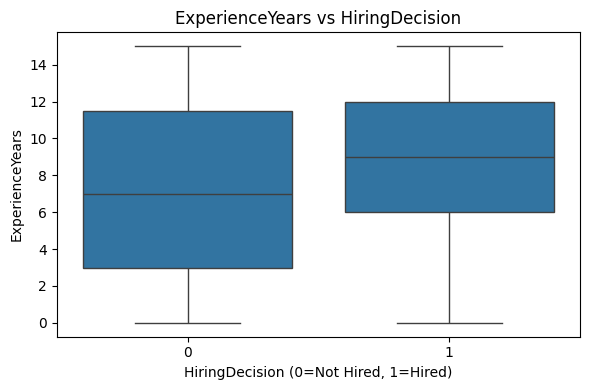

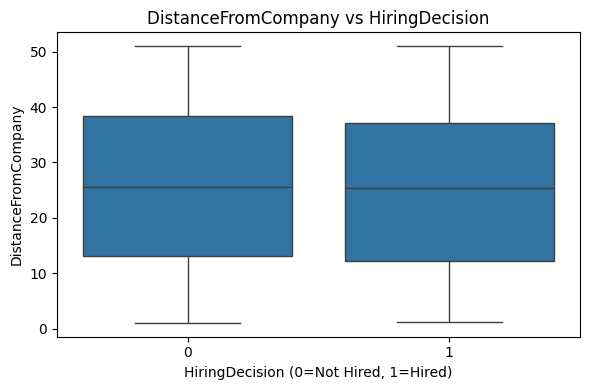

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ["SkillScore", "InterviewScore", "ExperienceYears", "DistanceFromCompany"]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="HiringDecision", y=feature, data=df)
    plt.title(f"{feature} vs HiringDecision")
    plt.xlabel("HiringDecision (0=Not Hired, 1=Hired)")
    plt.tight_layout()
    plt.show()


Average SkillScore by strategy and hiring outcome

In [ ]:
df.groupby(["RecruitmentStrategy", "HiringDecision"])["SkillScore"].mean().unstack()


HiringDecision,0,1
RecruitmentStrategy,,
1,36.087302,59.000000
2,48.980451,61.819048
3,47.704918,63.487805


In [ ]:
df.groupby(["RecruitmentStrategy", "HiringDecision"])["SkillScore"].describe()


count       mean        std  min    25%  \
RecruitmentStrategy HiringDecision                                            
1                   0               126.0  36.087302  26.727071  0.0  15.25   
                    1               319.0  59.000000  27.849438  0.0  36.50   
2                   0               665.0  48.980451  29.046617  0.0  23.00   
                    1               105.0  61.819048  27.456883  0.0  44.00   
3                   0               244.0  47.704918  30.070613  0.0  20.75   
                    1                41.0  63.487805  24.918991  3.0  53.00   

                                     50%   75%    max  
RecruitmentStrategy HiringDecision                     
1                   0               31.5  49.0   99.0  
                    1               64.0  82.0  100.0  
2                   0               50.0  73.0  100.0  
                    1               67.0  84.0  100.0  
3                   0               46.0  75.0  100.0  
                    1               65.0  84.0   99.0

In [ ]:
means = df.groupby(["RecruitmentStrategy", "HiringDecision"])["SkillScore"].mean().unstack()
means["Diff"] = means[1] - means[0]
print(means)


HiringDecision               0          1       Diff
RecruitmentStrategy                                 
1                    36.087302  59.000000  22.912698
2                    48.980451  61.819048  12.838596
3                    47.704918  63.487805  15.782887


 Across all strategies, hired candidates have higher average SkillScores than rejected ones.

Even though Strategy 1 hires more people:

Its hired candidates average skill = 59.0

While Strategy 2 = 61.8, Strategy 3 = 63.5

Text(0.5, 1.0, 'SkillScore by Strategy and Hiring Outcome')

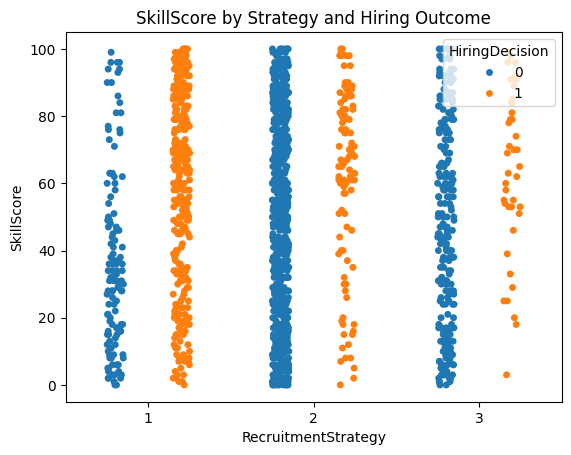

In [ ]:
sns.stripplot(x="RecruitmentStrategy", y="SkillScore", hue="HiringDecision", data=df, dodge=True)
plt.title("SkillScore by Strategy and Hiring Outcome")


Skill Score Distribution per Strategy

Text(0.5, 1.0, 'Skill Score Distribution per Strategy')

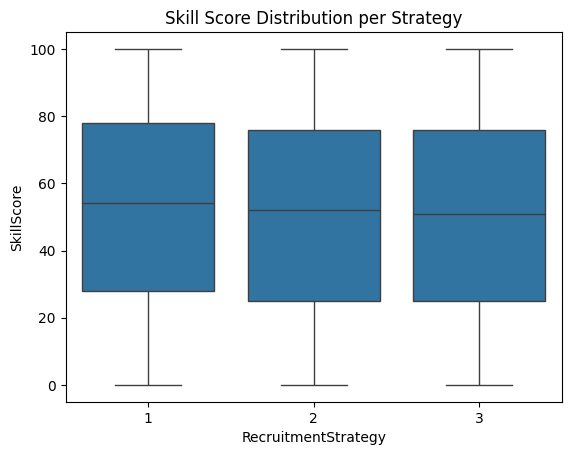

In [ ]:
sns.boxplot(x="RecruitmentStrategy", y="SkillScore", data=df)
plt.title("Skill Score Distribution per Strategy")


Check for potential gender bias and proxy features

In [ ]:
df[df["RecruitmentStrategy"] == 3].groupby("Gender")["HiringDecision"].mean()


,HiringDecision
Gender,
0,0.142857
1,0.145038


In [ ]:
gender_corr = df.drop(columns=["HiringDecision"]).corrwith(df["Gender"])
print(gender_corr.sort_values(ascending=False))


Gender                 1.000000
PersonalityScore       0.023729
SkillScore             0.012333
Age                    0.011286
EducationLevel         0.009676
DistanceFromCompany    0.003822
InterviewScore        -0.020887
RecruitmentStrategy   -0.023753
ExperienceYears       -0.028502
PreviousCompanies     -0.061915
dtype: float64


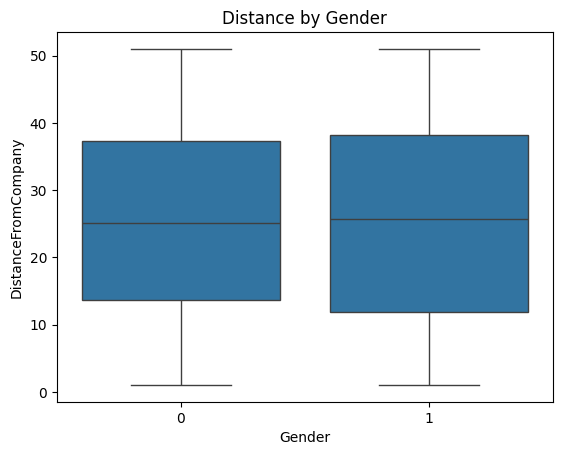

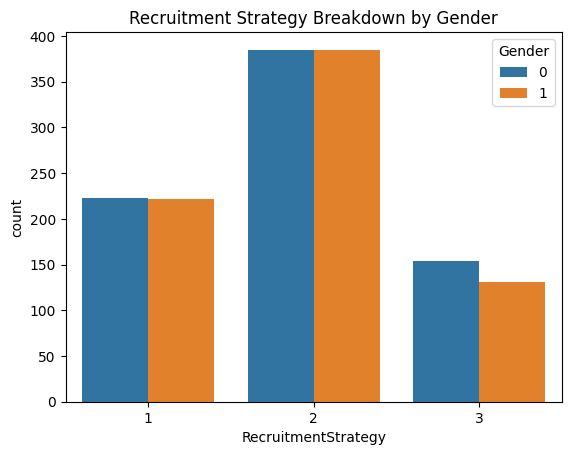

In [ ]:
sns.boxplot(x="Gender", y="DistanceFromCompany", data=df)
plt.title("Distance by Gender")
plt.show()

sns.countplot(x="RecruitmentStrategy", hue="Gender", data=df)
plt.title("Recruitment Strategy Breakdown by Gender")
plt.show()


In [ ]:
pd.crosstab(df["RecruitmentStrategy"], df["Gender"], normalize="index")


Gender,0,1
RecruitmentStrategy,,
1,0.501124,0.498876
2,0.500000,0.500000
3,0.540351,0.459649


From the above, we can see women and men are pursured nearly equally through aggressive and moderate recruitment strategy, but for conservative recruitment strategy there's a slight skew toward males (54% male vs 46% female).

In [ ]:
pd.crosstab(df["EducationLevel"], df["Gender"], normalize="index")


Gender,0,1
EducationLevel,,
1,0.521173,0.478827
2,0.509459,0.490541
3,0.482650,0.517350
4,0.529412,0.470588


In [ ]:
df["ExperienceBin"] = pd.cut(df["ExperienceYears"], bins=[0, 2, 5, 10, 15], labels=["0-2", "3-5", "6-10", "11-15"])
pd.crosstab(df["ExperienceBin"], df["Gender"], normalize="index")


Gender,0,1
ExperienceBin,,
0-2,0.505814,0.494186
3-5,0.503704,0.496296
6-10,0.506356,0.493644
11-15,0.518443,0.481557


In [ ]:
df["SkillBin"] = pd.cut(df["SkillScore"], bins=[0, 25, 50, 75, 100], labels=["Low", "Medium", "High", "Very High"])
pd.crosstab(df["SkillBin"], df["Gender"], normalize="index")


Gender,0,1
SkillBin,,
Low,0.527778,0.472222
Medium,0.491176,0.508824
High,0.507692,0.492308
Very High,0.508861,0.491139


Check to see which strategy is used

In [ ]:
strategy_counts = df["RecruitmentStrategy"].value_counts(normalize=True).sort_index()
print(strategy_counts)


RecruitmentStrategy
1    0.296667
2    0.513333
3    0.190000
Name: proportion, dtype: float64


Hiring Rate for Strategy + Gender

In [14]:
ct = pd.crosstab(df["RecruitmentStrategy"], df["Gender"], values=df["HiringDecision"], aggfunc="mean")
print(ct)


Gender                      0         1
RecruitmentStrategy                    
1                    0.726457  0.707207
2                    0.137662  0.135065
3                    0.142857  0.145038


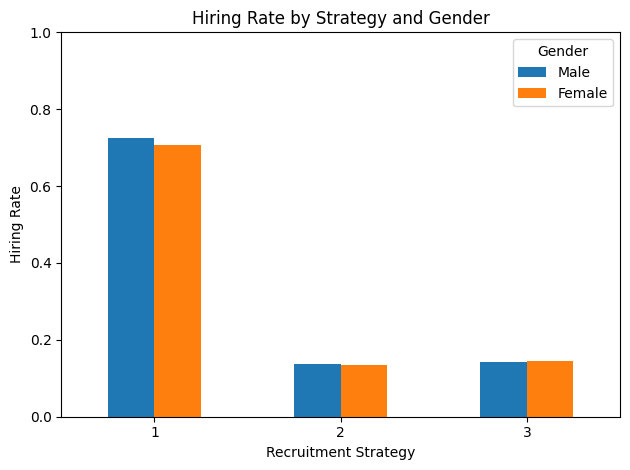

In [ ]:
import matplotlib.pyplot as plt

hiring_rate.plot(kind="bar")
plt.title("Hiring Rate by Strategy and Gender")
plt.ylabel("Hiring Rate")
plt.xlabel("Recruitment Strategy")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title="Gender", labels=["Male", "Female"])
plt.tight_layout()
plt.show()


But why do lower-skill females end up in strategy 3? Filtering for female candidates in Strategy 3





In [12]:
fem_s3 = df[(df["Gender"] == 1) & (df["RecruitmentStrategy"] == 3)]
fem_s3[["SkillScore", "EducationLevel", "ExperienceYears", "DistanceFromCompany", "PersonalityScore"]].describe()


,SkillScore,EducationLevel,ExperienceYears,DistanceFromCompany,PersonalityScore
count,131.000000,131.000000,131.000000,131.000000,131.000000
mean,45.244275,2.106870,7.572519,25.468553,50.900763
std,29.521072,0.777094,4.390603,15.347932,29.760029
min,0.000000,1.000000,0.000000,1.109207,0.000000
25%,21.000000,2.000000,4.000000,11.706851,23.500000
50%,41.000000,2.000000,8.000000,26.387608,55.000000
75%,70.500000,3.000000,11.000000,39.447440,75.500000
max,100.000000,4.000000,15.000000,50.909995,99.000000


Females in Strategy 1 or 2

In [ ]:
fem_other = df[(df["Gender"] == 1) & (df["RecruitmentStrategy"].isin([1, 2]))]
fem_other[["SkillScore", "EducationLevel", "ExperienceYears", "DistanceFromCompany", "PersonalityScore"]].describe()


,SkillScore,EducationLevel,ExperienceYears,DistanceFromCompany,PersonalityScore
count,607.000000,607.000000,607.000000,607.000000,607.000000
mean,52.830313,2.215815,7.556837,25.582095,49.920923
std,28.687675,0.870044,4.634814,14.873762,29.321542
min,0.000000,1.000000,0.000000,1.063404,0.000000
25%,29.000000,2.000000,4.000000,11.959829,23.500000
50%,55.000000,2.000000,8.000000,25.664041,50.000000
75%,77.000000,3.000000,12.000000,38.066926,76.000000
max,100.000000,4.000000,15.000000,50.952475,100.000000
